## Programming for Data Analysis Project Semester 2 ( 2020)
Brendan Ryan GMIT Student

<b> Notebook Index:  </b>

In this Jupyter notebook I will give an overview of the following 

-  <a href='#project_overview'>1. Project Overview</a>
    - <a href='#the_task'> The Task</a>
    - <a href='#project_aims'> Project Aims and the Phenomenon"</a>
- <a href='#getting_started'> 2. External Research"</a> 
- <a href='#getting_started'> 3. Getting Started - How did i obtain my data"</a>
    - <a href='#import_lib'>Importing Required Libraries</a>
    - <a href='#import_data'> Importing the Data</a>
    - <a href='#analyse'> Analyse and Reviewing the Data</a>
    - <a href='#distributions'> Types of distributions</a>
    - <a href='#age_dist'> Analyse Age Data and Distribution</a>
    - <a href='#amount_dist'> Analyse Loan Amount Data and Distribution</a>
    - <a href='#loan_purpose_dist'> Analyse Loan Purpose Data and Distribution</a>
    - <a href='#gender_dist'> Analyse Gender Data and Distribution</a>
- <a href='#relationships'>4. Visualise Some of the Relationships between Variables</a>
    - <a href='#corr'>Correlation between Numerical Variables</a>
    - <a href='#freq'>Frequency Table</a>
- <a href='#simulated_data'>5.  Create simulated synthetic random</a>
- <a href='#predictions'>6.  Using our Data to make Predictions</a>
- <a href='#conclusion'>7.  Project Conculsion and Summary</a>
- <a href='#research'>8. Research Undertaken and Sources</a>

<a id='project_overview'></a>
## Project Overview

The repository for this assignment and the README in relation to this jupyter notebook are located at
- https://github.com/brendantipp/sem2_prog_data_analysis_project


<a id='the_task'></a>
#### The Task
Project task to create a synthesised Dataset simulating a real world phenomenon.

For this project I have picked a real world phenomenon that exists in my own professional workplace which is a credit union.

That is what  is the likelihood of a member of the financial institution I work in availing of a service (in this case avail of a loan), based on variables that are contained in a pre existing database - for my project I will look at the variables listed below.

- Age
- Month (month of application)
- Date (date of appliation)
- Employment Status
- Gender
- Loan Purpose
- Loan Amount Range
- Loan Amount


However my main aim is to create a synthetic dataset containing values for age, loan amount, gender, and loan purpose.

<a id='project_aims'></a>
#### Project Aims

The aim of this project is to extract and analyse a real world phenomenon which is lending by age profile and from this try and determine the probabilities of loan products by age group and gender.

I will do this analysis using Python code through a jupyter notebook and utilising various additional libraries will review and analyse my dataset. 

In particular I want to look for any relationships between the variables and their likely distributions. 

From this research I then aim to create a synthetic simulated data set that will match as closely to my real world dataset. This simulated dataset could then be used for further testing and with a view to making predictions etc

__________________

<a id='getting_started'></a>
#### Getting Started - How did i obtain the data?

I obtained the data from an internal system using Business Intellegince software. That software that was used was Pentago BI. 
I extracted the data I felt I needed (the variables) and this data was extracted/exported to a csv file. This was ideal as python and pandas is widely used to analyse data contained in the CSV file format. The CSV file is saved in my repository as analysis.csv. The csv file does not contain any personal information and is used more for identifying trends.

________________

<a id='external_research'></a> 
## External Research of borrowing by Age profile

The majority of my analysis will be based around the data that i have extracted i.e the real life data. There is a wealth of data available online however I felt most of this data related more to the mortage market and outstanding debt where i am more interested in this particular project to look at new borrowing and the profile of same. I  feel/hope that with this course and futher reading and experimenting I will do a project on loans outstading by difference demographics etc and analysise trends over a number of years. I will however include the following as i found them interesting and I will quote external sources in some of my findings as we analise the data further.

In the graph below which shows the number of products held by age profile in a sample financial institution. It is intersting to note here that number of products held (including loans) starts to rise sharply from age 30 - peaking in the age group 45 - 54 and then declining from age 55 onwards - it will be interesting to see if this is similar ot the patter or loans applied for by age groups in my dataset. - source https://www.cso.ie/en/releasesandpublications/ep/p-hfcs/householdfinanceandconsumptionsurvey2018/debtandcredit/

<img src="images/image1.jpg">

Again in the next graph we can see the Distribution of average debt from personal loans* in the United Kingdom (UK) 2017, by age profile - although this graph looks at the debt outstanding it also gives us another indication as to the age profile of peronal lending. - https://www.statista.com/statistics/793646/average-amount-owed-in-loans-uk/

<img src="images/image2.jpg">

As we can see from the graph above the main age mean is approx 40 years old increasing from age 25 upwards and declinning again from age 45 onwards - I would expect to see this follow through in the analysis of my own data set  -lets see

<a id='import_lib'></a>
## Getting Started - importing required libraries.

##### Import the required libraries
I will be using the numpy.random package from python and i will also be utilising the Matplotib and Seaborn packages for better visualisation using graphs. Futher on in the project i will look at tools availble from Skit-learn and Scipy.

In [61]:
#code to import pandas is a software library for data manipulation and analysis
import pandas as pd
#code to import numpy for working with arrays scientific computer etc 
import numpy as np
#code to import matplotlib plotting library
import matplotlib.pyplot as plt
#code to import seaborn - more plots better visual
import seaborn as sns
#magic code to show plots as required 
%matplotlib inline

<a id='importing_dat'></a>
#### Importing the Data
Import our Data Set which I extracted based on the output of ones years lending - we are going to use Pandas library to read and for analysing our data set.

In [62]:
#import my dataset and best practice name as df
df = pd.read_csv('analysis.csv')

<a id='analyse'></a>
#### Test that our data set has loaded and check for errors 

In [63]:
#display out imported dataset
df

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
0,19,October,04/10/2019,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,28/08/2019,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,28/03/2019,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,28/09/2019,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,22/08/2019,STUDENT,Male,Student,"5,001 - 10,000",10000.0
...,...,...,...,...,...,...,...,...
3931,85,June,07/06/2019,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,25/02/2019,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,02/12/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,01/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0


Ok from above we can determine we have 3936 rows of date with 8 colums

#### df.head and df.tail
Now lets further analyse and examine our imported data by using df.head and df.tail functions that are available in pandas.

Firstly df.head() function returns the first 5 rows (default) -  both functions are useful for quickly testing if our dataset has the right type of data in it.

In [66]:
#pandas df.head function - default is to return top 5 rows
df.head()

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
0,19,October,04/10/2019,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,28/08/2019,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,28/03/2019,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,28/09/2019,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,22/08/2019,STUDENT,Male,Student,"5,001 - 10,000",10000.0


In [67]:
#pands df.tail function by default returns last 5 rows 
df.tail()

,age,month_application,date_application,employment_status,gender,loan_purpose,loan_amount_range,loan_amount
3931,85,June,07/06/2019,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,25/02/2019,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,02/12/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,01/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3935,89,March,28/03/2019,RETIRED,FEMALE,Personal,"1,001 - 5,000",3000.0


Everything looks ok above we can see the shape of our dataframe is correct

Lets have a look at the typoe of variables we have to work with using the df.dtypes function 

In [68]:
#using pandas df.types to looking at the data types 
df.dtypes

age                    int64
month_application     object
date_application      object
employment_status     object
gender                object
loan_purpose          object
loan_amount_range     object
loan_amount          float64
dtype: object

Ok as we can see from above we are dealing with 3 different data types - 
- int64 for age
- object for the variables month_application,date_application, employment_status,gender,loan_purpose, loan_amount_range
- float64 for the loan_amount

Looking at the above results we can asscertain that we need to covert the date of application to a date_time type rather than an object which it currently is.

In [70]:
#look at making the Financial month a date time # help from https://https://pbpython.com/pandas_dtypes.html
#https://stackoverflow.com/questions/16852911/how-do-i-convert-dates-in-a-pandas-data-frame-to-a-date-data-type
df["new_date_application"]= pd.to_datetime(df['date_application'])

#### df.info()
Lets have a look at df.info which is another useful tool to give us more info on our dataframe and to check has our to date time  above worked. I will leave both the date_application and the new_date_application in my data frame to show the difference.

In [8]:
#using pandas built in function df.info to us more info including each data type in use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   3936 non-null   int64         
 1   month_application     3936 non-null   object        
 2   date_application      3936 non-null   object        
 3   employment_status     3936 non-null   object        
 4   gender                3936 non-null   object        
 5   loan_purpose          3936 non-null   object        
 6   loan_amount_range     3936 non-null   object        
 7   loan_amount           3936 non-null   float64       
 8   new_date_application  3936 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 276.9+ KB


As we can see above we have a colum new_date_application which is dytpe of datetime64[ns]

In [71]:
#using pands df.describe to give us more statistical info
df.describe().round(decimals = 0)

,age,loan_amount
count,3936.0,3936.0
mean,45.0,4756.0
std,16.0,8384.0
min,19.0,0.0
25%,32.0,700.0
50%,44.0,2000.0
75%,57.0,5000.0
max,89.0,102500.0


Ok as Age and Loan Amount are our only columns of type integer/floating points they are the only ones which will be returned for statistical values as shown above.

So using the pandas df.describe function we get some interesting statistics for the age and the loan amounts,
The average age of our borower is 45 years old, this corresponds with out research above which showed the average age of a borrower as approx 40 years to 45 years. We can determine the average loan amount is approx €4,756. 
We will cross check these stats further on in our sythentic data set to make sure they align and to ensure our sythetic dataset is a valid representation.

### Best practice -  convert some of our data types into categories

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

The Pandas documentation has a concise section on when to use the categorical data type and they recommend it should be use the following data type:


- A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.

- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.

- As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [72]:
#convert required varibales to cateogories
df[["month_application","gender", "employment_status","loan_purpose"]] = df[["month_application","gender", "employment_status","loan_purpose"]].astype("category")

In [73]:
#using pandas built in function df.info to us more info including each data type in use
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   3936 non-null   int64         
 1   month_application     3936 non-null   category      
 2   date_application      3936 non-null   object        
 3   employment_status     3936 non-null   category      
 4   gender                3936 non-null   category      
 5   loan_purpose          3936 non-null   category      
 6   loan_amount_range     3936 non-null   object        
 7   loan_amount           3936 non-null   float64       
 8   new_date_application  3936 non-null   datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 170.3+ KB


#### Imporved memory usuage
Ok as we can see from above by changing some of our data types from objects to categories the memory usage has almost halved from 246 kb to 149kb - this may not mean alot for this dataset but if we want to analyse a number of years data or other large datasets the efficiency in memory usage would be very benefical and result in our code running faster.

### Add additional numerical value data by coverting month of application into a number 

As the project progressed I noticed that for ease of generating random data, looking at the stats of this random data and for the relationships that I required more numerical data. Figuring out the correlation between variables was also only possible using numerical values. It was for that reason I deciDed to covered my month of application data to numerical and further on I hope to make use of this numberical representation of month.


In [74]:
#generate a month number for each month of application
df['month_number'] = pd.DatetimeIndex(df['new_date_application']).month

<a id='distributions'></a>
## Reviewing the data to figure out the types of distributions

The main aim in this analysis is to look at the distribution of the age and gender data then look at the relationship between the age and gender of the borrower against the loan purpose and then investigate the relationship between the loan purpose and the amount borrowed. We will then use our findings to help create a synthetic data set.

<a id='age_dist'></a>
### Analyse Age data and Distribution

Below i will use the pandas built in function describe to give me statistical values for Age, i will also plot data as a displot to review the distributioin of that data.

In [13]:
#using pandas.describe function to return stats and .round to round values for presentation
df.age.describe().round()

count    3936.0
mean       45.0
std        16.0
min        19.0
25%        32.0
50%        44.0
75%        57.0
max        89.0
Name: age, dtype: float64

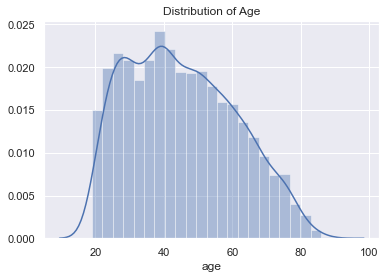

In [75]:
#declare the variable age - can call directly from dataframe also! will use further on
age = df["age"]
#use a displot from seaborn for visualisation 
sns.distplot(age);
#give the plot a title 
plt.title("Distribution of Age")
#show the plot
plt.show()

We can see from using df.describe and visualised using our plot the average age of the borrower is 45 - the minimum age is 19 and the max age of a borrower is 89. 

Based on the above and after much research i have have decided that our age distribution matches closest to that of a Triangular Distribution and i will discuss that futher below when creating my sample Age data as to why I decided on a triangular distribution (lets say over a normal distribution for example)

<a id='amount_dist'></a>
### Analysis Loan Amount Data and Distribution

Again use pandas .describie to output some statitics on this data column. The use a seaborn displot to the graph to visulaise the distribution.

In [15]:
#perform a pandas df.desribe for stats on loan_amount
df.loan_amount.describe().round(2)

count      3936.00
mean       4755.63
std        8383.67
min           0.00
25%         700.00
50%        2000.00
75%        5000.00
max      102500.00
Name: loan_amount, dtype: float64

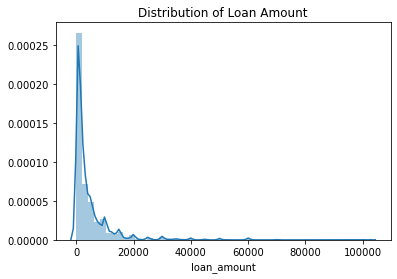

In [16]:
#create a seaborn displot to visualise the distribution
sns.distplot(df["loan_amount"]);
plt.title("Distribution of Loan Amount")
#give the plot a title
plt.show()

My research pointed me towards a Pareto distribution or a Exponential Distribution.

Spoiler alert *** (I found it difficult to code random sample data based on these distributions to match the sample data i felt i wanted further information as go on)

<a id='loan_purpose_dist'></a>
### Analyse Loan Purpose Data and Distribution

To analyse my loan_puopose column in my dataframe I am going to use a category plot from seaborn. This is a nice visual plot and by using the (kind = count) parameter will count the number of times each value is found.

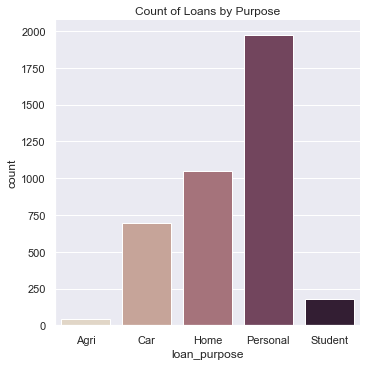

In [78]:
#create using a seaborn category plot
sns.catplot(x="loan_purpose", kind="count", palette="ch:.25", data=df);
#Give the plot a title 
plt.title("Count of Loans by Purpose")
#https://seaborn.pydata.org/tutorial/categorical.html
#show the plot 
plt.show()

So we can see above that there are 5 possible outcomes for the loan purpose. I feel that the best way to generate the random sample data from above would be to use the Numpy choice function to generate the sample data based on probabilities which we will explore further on. A normal distribution or maybe a triangular distribution is the closest match but i will use the choice function using probabilites to create random sample data.

In [80]:
## Analyse Employment status if required
## sns.catplot(x="employment_status", kind="count", palette="ch:.25", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html
##### not using for this project

<a id='gender_dist'></a>
### Analyse Gender Data and Distribution

To analyse the distribution of gender we can firstly use the Pandas function groupby and count to return the number of values for each

In [81]:
#use the groby and count functions to count the number of males and females
df[["gender","age"]].groupby("gender").count()
#https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/06_calculate_statistics.html

,age
gender,
FEMALE,2072
Male,1864


We can see from above that in our dataset there are slightly more female that male borrowing members. Split of apprx 52% female and 48% male.

We can also use a Seaborn Count plot to visualise our values - a countplot is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value. 

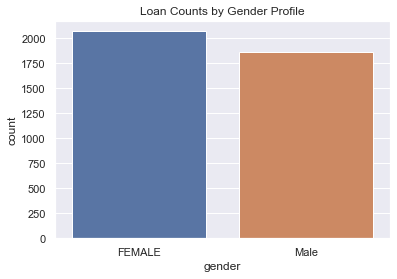

In [82]:
#seaborn countplot using gender colum from dataset
sns.countplot(x='gender',data=df);
#https://datascienceplus.com/seaborn-categorical-plots-in-python/
#give the plot a title
plt.title("Loan Counts by Gender Profile")
#show the plot
plt.show()

From the plot above and our stats we can see that the distribution can be classed as a uniform distribution. 
We may use this distribution further on when creating our random sample data or possibly a random choice function and setting my probabilities.

#### An analysis of loans based on the month they are issued

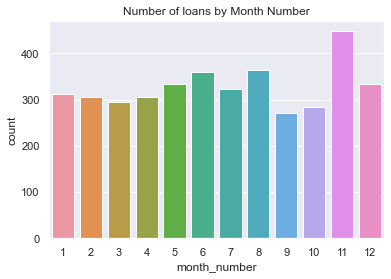

In [83]:
#create a seabron countplot of month number
sns.countplot(data=df, x = "month_number");
#give the plot a title
plt.title ("Number of loans by Month Number")
#shot the plot
plt.show()

This is a interesting graph and would be very useful when allocating staff resources - From above I think a uniform distribution would best match my sample data.

<a id='relationships'></a>
### Visualise Some of the Relationships between Variables

I am going to look at some of the relationships between some of the variables. This can be done by utilising a number of graphs and plots available within python libraries. I will also take a look at the correlation between some of the variables using the tools available from Numpy and possibly from Pandas.

#### Relationship between Age and Gender

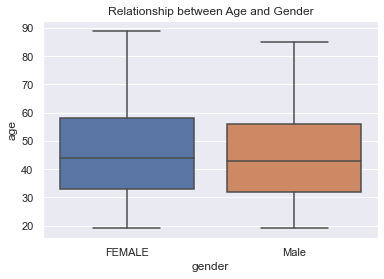

In [85]:
#using seaborn boxplot with x and y variables to visuale relationship between age and gender
sns.boxplot(x='gender',y="age",data=df);
#give the plot a title
plt.title("Relationship between Age and Gender")
plt.show()

We can see from above that the breakdown of gender by age group that it is very similar with the main concentration in the 30 to 60 age group for both males and females - we will test our sample generated further to see can we get it to match as close to above as possible.

#### Loan Purpose by Age and Gender Breakdown

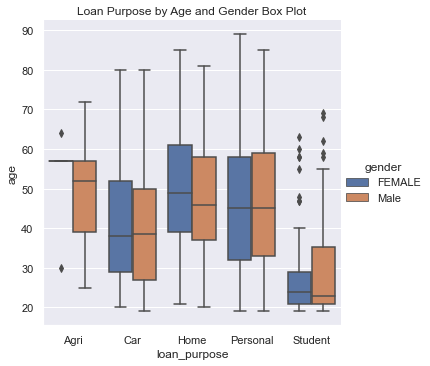

In [86]:
#using seaborn boxplot with x and y variables to visuale relationship between age and loan purpose
sns.catplot(x="loan_purpose", y="age", hue="gender", kind="box", data=df); #https://seaborn.pydata.org/tutorial/categorical.html
#give the plot a title
plt.title("Loan Purpose by Age and Gender Box Plot")
#show the plot
plt.show()

As shown above this catplot from seaborn (as type box) shows a very nice visual representation between the loan purpose selected by the borrower based on their age and gender. 
Some interesting points to take from this 
- The breakdown is very much 50/50 between the loan purpose selected for both females and males expect for 
- Agri prupose where we can now determine it is predominantly males aged between 40 and 58 - which is probably no suprise
- Surprisingly for me More males tend to take student loans than females - however it is quiet evident that student loans as we would expect are taken by members aged in thh 20 to 35 age group with the average approx 22/23 year old
- Apart from Student loans the average age of borrowers is approx between 38 and 50 in most cases. This stat would also suggest that this is the main catchment group and possibly younger members are either not borrowing or borrowing elsewhere.

#### Loan Pupose by Age and Gender

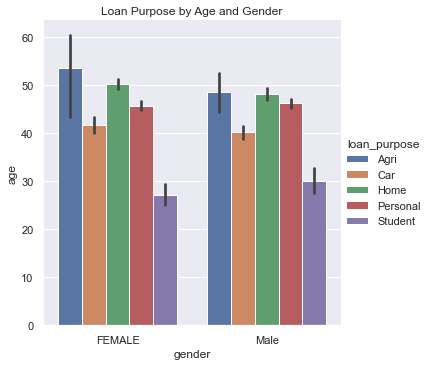

In [87]:
##using seaborn boxplot using x y varibaes and using loan purpoose as the "hue" for visualisation
sns.catplot(x="gender", y="age", hue="loan_purpose", kind="bar", data=df);
#give the plot a title
plt.title("Loan Purpose by Age and Gender")
#show the plot
plt.show()

The graph above is also another very good visual representation of the loan pupose by gender distribution. 
We can see  based on the use of the black line the average age of the borrower per loan purpose.

#### Loan Purpose by Gender Profile Countplot

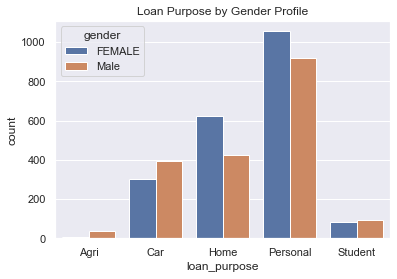

In [27]:
#set the style of the countplot
sns.set(style="darkgrid")
#generate a countplot of loan purpose
sns.countplot(x='loan_purpose',hue="gender" , data=df)
#show the title
plt.title ("Loan Purpose by Gender Profile")
#plot the graph
plt.show()

In [28]:
#https://towardsdatascience.com/hands-on-python-data-visualization-seaborn-count-plot-90e823599012

The above countplot from the seaborn library shows the breakdown of loan pupose by gender. It is a good visulisation to see the product (loan pupose) each gender decides upon. Observations - more males borrow for cars, studnet and agir  loans however females tend to borrow more for Home and Personal purposes and these are the most popular loan purposes.

______________________

### Loan Purpose by Month of Application

In this analysis I look at the loan application purpose by the month of the application. I have already converted the month of application to a number and I will use this field for this analysis.

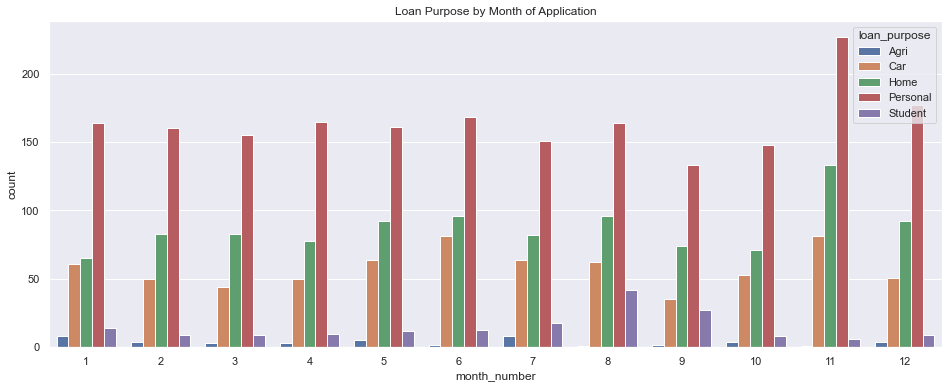

In [90]:
plt.figure(figsize=(16,6))#used to extend size of grapch for better visual
#display using a seaborn countplot
plt.title("Loan Purpose by Month of Application")
#create a count plot for the month number and loan purpose
sns.countplot(x='month_number',hue="loan_purpose" , data=df);
#display the plot
plt.show()

The above graph give us some very interesting insights into the data for the loan purpose by the month of application.

- The number personal loans is consistent through the year with a spike in November suggesting more personal loan applications in the lead up to christmas
- The number of Student loans is at its highest around August with the second highest month of applications being September, this would suggest the majority of students/parents will be looking at their school or 3rd level expenses at this time which is to be expected.

Seaborn library has a great heat map visual tool that can be used to map the correlations between categories. The higher the number is the greater the correlation between the two elements. A high positive correleation indicates that the two elements have a positive linear relationship (as one increases the other also increase), and a low negative correlation indicates a negative linear relationship( as one increases the other decreases).

<a id='corr'></a>
### Correlation between Numerical Variables

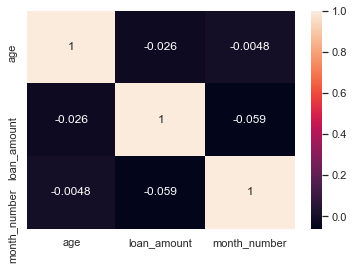

In [30]:
sns.heatmap(df.corr(),annot= True); #insert link here from medium that i used from below

We  can also calculate the correlation between any two variables by using the code below however i found the visual heatmap above a great way of displaying the results. Below can also be achieved in pandas using df.corr but as the basis of this project is numpy i will use np.corrcoef in  my example.

Based on above we can determine that there is a weak negative correlation between our numerical variables - (!!! that does not help with creating my sample data"

In [91]:
corr_matrix = np.corrcoef(df['age'],df["loan_amount"],)
corr_matrix

array([[ 1.        , -0.02574577],
       [-0.02574577,  1.        ]])

<a id='freq'></a>
### Frequency Table

In my research i found the following very interesting which is a method of finding the distribution between two categorial variables - reference - https://www.pluralsight.com/guides/finding-relationships-data-with-python
A crosstab function can be used to create a  two way table between two variables - below i will create a two way table between the categorical variables loan_purpose and gender.

In [93]:
#using the pandas crosstab function
#pd.crosstab(df["loan_purpose"],df["gender"])
pd.crosstab(df["loan_purpose"],df["employment_status"])

employment_status,CONTRACT,FULL TIME,HOMEMAKER,PART TIME,RETIRED,SOCIAL WELFARE,STUDENT,UNEMPLOYED
loan_purpose,,,,,,,,
Agri,0,37,0,3,3,1,0,1
Car,0,516,8,60,47,11,15,39
Home,0,633,18,86,144,35,0,129
Personal,4,981,34,187,239,75,23,430
Student,0,56,0,31,2,0,84,4


#### Visualising some relationships using a Pairplot.

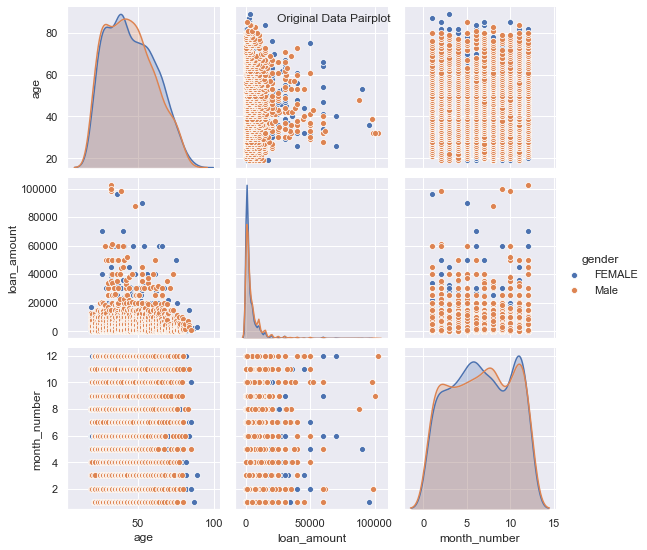

In [94]:
sns.pairplot(df,hue ="gender");
#show the title
plt.suptitle("Original Data Pairplot");
plt.show()

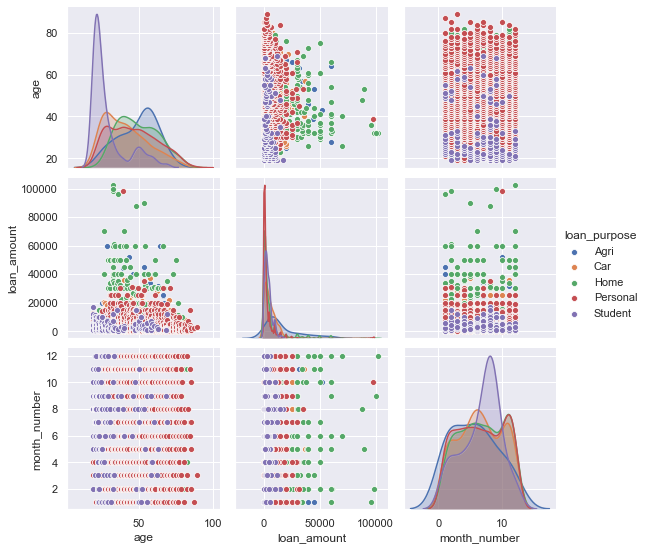

In [34]:
#using the seaborn pairplot - set the due to loan purpose for better visualisation 
sns.pairplot(df,hue ="loan_purpose");

_______________________

<a id='simulated_data'></a>
## Create Simulated Synthetic Data

#### What is synthetic data?

Synthetic data is artificial data that is created by using different algorithms that mirror the statistical properties of the original data but does not reveal any information regarding real people

#### Why is synthetic data important for businesses?
Synthetic data is important for businesses due to three reasons: privacy, product testing and training machine learning algorithms.

#### When to use synthetic data?

Businesses trade-off between data privacy and data utility while selecting a privacy-enhancing technology. Therefore businesses need to determine the priorities of their use case before investing. Synthetic does not contain any personal information, it is a sample data that has a similar distribution with original data. However, the utility of synthetic data can be lower than real data.

source https://research.aimultiple.com/synthetic-data-generation/

### My Synthesised Data Set

I am now going to simulate a new sample dataset matching as closely as possible to the imported dataset above which i have analysed.

My new sample dataset will have x number of colums containing 4,000 rows of data. (I have picked 4,000 so it will be closey to my original dataset)

The new colums I have selected for my sample data set will be as follows as the main purpose was to see the relationships betwen these 4 variables.

- sample_age
- sample_loan_purpose
- sample_gender
- sample_loan_amounts

Below i am going to create an empty dataframe and set the numper of samples to use for this project. The project example was 200 data points but as i want to match as closely as possibly to my original dataset I will create 3996 samples

In [35]:
#create emplty data frame in pandas
sample_df = pd.DataFrame()
#set/define our number of samples
n_samples = 3936

First Initialize np.random.default_rng()

Best practice in Numpy v1.19 is to use Random Generator. The Generator provides access to a wide range of distributions and served as a replacement for RandomState. The function numpy.random.default_rng will instantiate a Generator with numpy’s default BitGenerator as shown below. reference - https://numpy.org/devdocs/reference/random/generator.html#numpy.random.default_rng


In [95]:
# The function numpy.random.default_rng will instantiate a Generator with numpy’s default BitGenerator.
rng = np.random.default_rng()

## Generate Sample Age Data

Start with the creation of the sample data as per the Age column - as i said above i believe the distribution of the Age variable is closest aligned to that of a Triangular Distribution. I initially  looked at a Gamma Distribution as show in my example below but as as that function does not allow a mix or max value for age I felt it would skew my sample data results.

I am going to use the pands df.describe fuction to get the mean and standard deviation of the data in the Age column and we will incorporate this into our numpy triangular distribution function to create our sample data. I wanted to use a distribution where i could define my mix and max ages and also use the mean from my imported dataset.

In [107]:
#using pandas .describe fucntion on our age column.
df.age.describe().round(2)

count    3936.00
mean       45.24
std        15.60
min        19.00
25%        32.00
50%        44.00
75%        57.00
max        89.00
Name: age, dtype: float64

In [112]:
#from above result we can set our mean_age and deviation_age
mean_age = df['age'].mean()
min_age = df['age'].min()
max_age = df['age'].max()
print("mean age is", mean_age, "min age is", min_age, "max age is", max_age)
#we will also set our min age and max age from above results

mean age is 45.24136178861789 min age is 19 max age is 89


We can see our average age of a borrower is in and around 45 years old

#### Testing Gamma Distribution for Age
So as mentioned earlier i though about using a Gamma Distributioni to genderate my sample Age data. For the gamma distribution I needed to generate the shape as in the following forumual (mean*mean)/var and the scale from the following formula (var/mean) where var is the variance 

In [113]:
var = df["age"].var()
scale = (var/mean_age)
shape=(mean_age*mean_age)/var
gamma_age = rng.gamma(shape,scale,4000)
print("Gamma Dist mean is",gamma_age.mean())
print("Gamm Min age is", gamma_age.min(),"and Gamma Max age is", gamma_age.max())

Gamma Dist mean is 45.32538729400729
Gamm Min age is 8.31106780715567 and Gamma Max age is 119.4388977820731


Results from Gamma Distribution - as mentioned above i was not satisfied with the min and max age values returned and therefore will test outputs using a triangular distribution.

### Age distribution using a Triangular Distribution
The numpy.random.triangular function is as follows - ref numpy.org
numpy.random.triangular(left, mode, right, size), using this distribution function I am able to set my min and max age profiles which is somthing I wanted to do, especially with the minimum borrowing age being 18!

In [114]:
#create the column random_age using numpys random distribution t - covert to integer
sample_age = rng.triangular(min_age,mean_age,max_age,n_samples).astype(np.int)

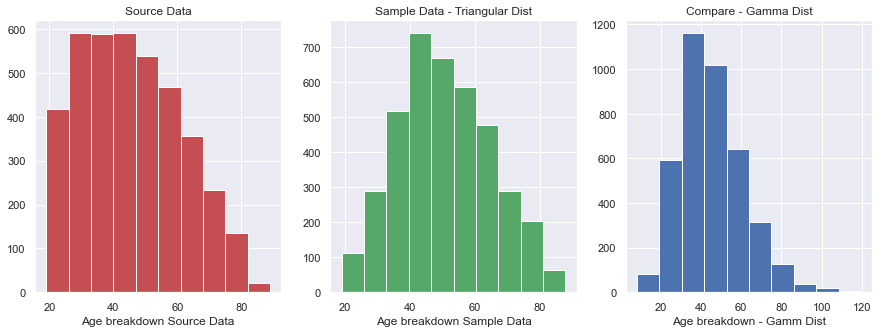

In [115]:
#create my subplots, 3 colums 1 row and defining the size
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].hist(age,color = 'r') #1st plot colour red
ax[0].set_title('Source Data') #give it a title
ax[0].set_xlabel('Age breakdown Source Data') # give it an x label
ax[1].hist(sample_age,color = 'g') #1st plot colour red
ax[1].set_title('Sample Data - Triangular Dist')
ax[1].set_xlabel('Age breakdown Sample Data')# give it an x label 
ax[2].hist(gamma_age,color = 'b') #3rd plot 
ax[2].set_title('Compare - Gamma Dist') #give it a title
ax[2].set_xlabel('Age breakdown - Gamm Dist') # set the x label
plt.show(); #show the plot

In [42]:
print("The Sample Data Mean Age is", sample_age.mean().round(2))
print("The Sample Data Min Age is", sample_age.min().round(2))
print("The Sample Data Max Age is", sample_age.max().round(2))

The Sample Data Mean Age is 50.73
The Sample Data Min Age is 19
The Sample Data Max Age is 88


I am happy that I have been able to set the min and max age and that my average is approx 50 - it is not 100% correct and higher than my original mean age but as this is used for sample data i will run with this. I am happy with the distribution as visualised above as it will be a sample dataset - our sample age will be named sample_age.

## Generate Sample Loan Purpose Data

I have already converted the date in loan purpose to a category as I am aware there are not that many unique values and that type of date is ideal for as data type category.  

I am going to create a new list from the unique values in my column.

In [43]:
#create new list sample loan types from unique values in loan_purpose from my dataframe
sample_loan_types = df['loan_purpose'].unique().tolist()
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
sample_loan_types

['Car', 'Student', 'Personal', 'Home', 'Agri']

So from above I  know there are 5 unique loan purposes and i have created a new list sample_loan_types which contains these values 

###### Setting my probabilities 

I found useful information as reference below on how to covert my loan_pupose counts into a dict. 
The key being returned in the Dict is the loan purpose and we can see that it returns the calculated perecentage as a fraction being the number of times each appeared for example below we can see that borrowers opted for a personal loan in over 50% of cases

In [44]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
#https://stackoverflow.com/questions/29403192/convert-series-returned-by-pandas-series-value-counts-to-a-dictionary
org_loan_types_prob =dict(df['loan_purpose'].value_counts(True).round(2))
print("Orginal calc prob /" ,org_loan_types_prob)

Orginal calc prob / {'Personal': 0.5, 'Home': 0.27, 'Car': 0.18, 'Student': 0.04, 'Agri': 0.01}


We are now going to use the values returned above to set our probabilites our random.choice function. I had to be careful to match the probabilites to the values exactly as how they appeared in the list sample_loan_types

In [116]:
#create our random loan data using random.choice and the proababilities
#0.176829,0.044970,0.501270,0.265498,0.011433
sample_loan_purpose = rng.choice(sample_loan_types, size=n_samples,p=[0.176829,0.044970,0.501270,0.265498,0.011433])
#create a test dataframe dftest
dftest = pd.DataFrame({'sample_loan_purpose':sample_loan_purpose})
#create a new dict from above to test values returned against original 
probabilty_test =dict(dftest['sample_loan_purpose'].value_counts(True).round(2))
print("Sample calc probabilites /",probabilty_test)
print("Orginal calc prob /" ,org_loan_types_prob)

Sample calc probabilites / {'Personal': 0.51, 'Home': 0.26, 'Car': 0.18, 'Student': 0.05, 'Agri': 0.01}
Orginal calc prob / {'Personal': 0.5, 'Home': 0.27, 'Car': 0.18, 'Student': 0.04, 'Agri': 0.01}


Ok so we can see from the above the proability of the loan purpose appearing in our sample dataset is closely aligned to the probability of that in our new sample random data set. Lets run with that.

### Generate Sample Gender Data

Could use a uniform distribtion function but decided to go with the numpy.choice function. Generating our sample random gender data is easy enough as we know there can only be two values and we have already determined the probabilities of each gender type appearing from our sournce data set. We know in general slightly more females borrow than males so we will set our probabllites of each one appearing as .48 for male and .52 for female. I am going to use a random.choice function from numpy to generate my random values for sample_gender

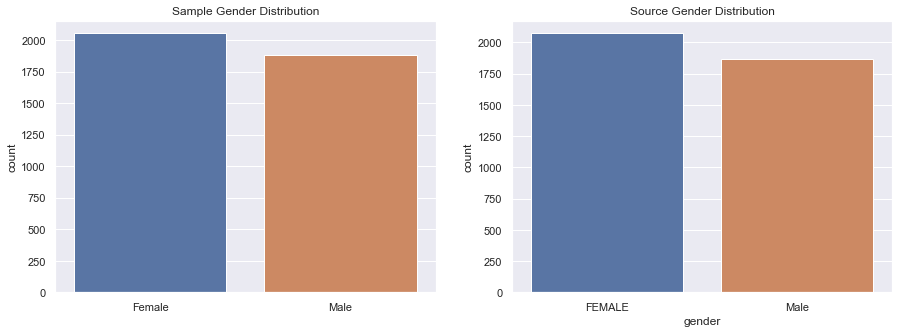

In [117]:
#set my values
gender_values = ("Male", "Female")
#generate my sample gender data using my proababilities 
sample_gender = rng.choice(gender_values,size = n_samples,p = [.48,.52])


#plot out my results 
fig, ax = plt.subplots(1,2,figsize = (15,5))#set the axis layout and size
sns.countplot(sample_gender,ax=ax[0]).set_title("Sample Gender Distribution");#generate countplot set title
sns.countplot(df["gender"],ax=ax[1]).set_title("Source Gender Distribution"); #generate countplot set title
plt.show(); #display the plot

Im happy with my output for sample gender and closely  matches the distribution of my original source data

### Generate Sample Loan amounts data

Ok so i struggled with this one even though it was a numerical value - the distribution was quiet lobsided towards the lower value amounts as shown below.

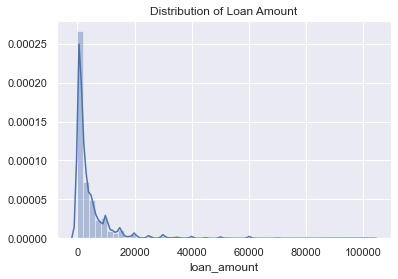

In [118]:
#create a seaborn displot to visualise the distribution
sns.distplot(df["loan_amount"]);
plt.title("Distribution of Loan Amount")
#give the plot a title
plt.show()

A Pareto Distribution came to mind first but i could not seem to get the values that I required (needs more work and research) so I looked at creating sample amounts based on the proabilites that they might appear in the dataset... interesting...

In [120]:
#create my sample_loan_amounts_prob
#going to create these in a dictioinary from my loan amount data to see how many times each one appears
sample_loan_amounts_prob =dict(df['loan_amount'].value_counts(True))

In [126]:
#there must be a random choices in Numpy not just from standard libruary goint to import random 
#https://stackoverflow.com/questions/4859292/how-to-get-a-random-value-from-dictionary-in-python
#https://stackoverflow.com/questions/40927221/how-to-choose-keys-from-a-python-dictionary-based-on-weighted-probability
import random
sample_loan_amount = random.choices(list(sample_loan_amounts_prob.keys()),
                                    weights=sample_loan_amounts_prob.values(),
                                    k=n_samples)

In [127]:
#testing 
loan_mean = df["loan_amount"].mean()
print("The orginal loan amount mean is", loan_mean)
sample_loan_mean = sum(sample_loan_amount)/len(sample_loan_amount)
print ("The Sample data loan amount mean is ",sample_loan_mean )#havent created dataframe yet

The orginal loan amount mean is 4755.631979166668
The Sample data loan amount mean is  4958.050693597561


Interesting .....  from going with the above method we can see the average loan amount in our sample data is closely aligned to that from our original source data. May not be the right way of generating this data? but interesting results....
Lets have a look below at our distribution of Sample Loan Amounts,

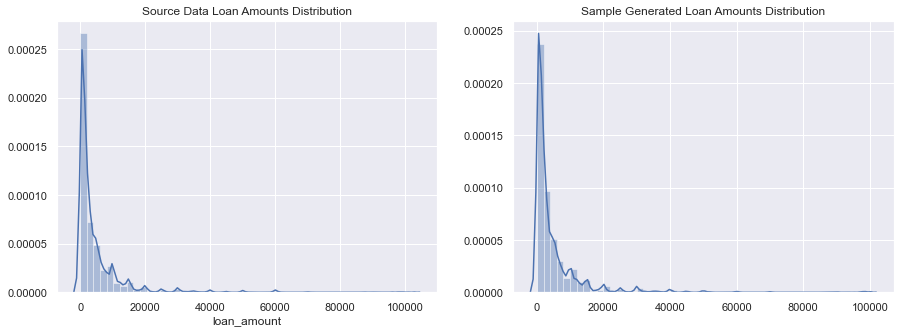

In [123]:
fig, ax = plt.subplots(1,2,figsize = (15,5))#set the axis layout and size
sns.distplot(sample_loan_amount, ax = ax[1]).set_title("Sample Generated Loan Amounts Distribution");
sns.distplot(df["loan_amount"], ax = ax[0]).set_title("Source Data Loan Amounts Distribution");

### Add new Synthetic Sampe Data to my Data Frame

Now to create my sample dataframe which i will name sample_df

In [124]:
#add my new sample data to my data frame
sample_df = pd.DataFrame({'sample_age':sample_age ,
                   'sample_loan_purpose':sample_loan_purpose ,
                   'sample_gender': sample_gender ,
                          'sample_loan_amount':sample_loan_amount
                  })

In [129]:
#display by new sample dataframe
sample_df

,sample_age,sample_loan_purpose,sample_gender,sample_loan_amount
0,32,Personal,Female,8000.0
1,59,Home,Female,6000.0
2,48,Home,Female,3000.0
3,35,Home,Male,11000.0
4,61,Personal,Male,250.0
...,...,...,...,...
3931,42,Personal,Female,4500.0
3932,61,Personal,Male,600.0
3933,63,Personal,Female,1500.0
3934,53,Personal,Female,11000.0


### Lets do some comparisons between the source data and our new Synthetic Data Set

I start by using pandas.desribe function to return stats on my dataframe.

In [54]:
#using pandas built in fucntion .desribe and round for visual purposes
sample_df.describe().round(2)

,sample_age,sample_loan_amount
count,3936.00,3936.00
mean,50.73,4929.55
std,14.35,8812.18
min,19.00,0.00
25%,40.00,700.00
50%,50.00,2000.00
75%,61.00,5000.00
max,88.00,102500.00


In [55]:
#using pandas built in fucntion .desribe and round for visual purposes
df.describe().round(2)

,age,loan_amount,month_number
count,3936.00,3936.00,3936.00
mean,45.24,4755.63,6.67
std,15.60,8383.67,3.46
min,19.00,0.00,1.00
25%,32.00,700.00,4.00
50%,44.00,2000.00,7.00
75%,57.00,5000.00,10.00
max,89.00,102500.00,12.00


In [130]:
print("Some testing ... we can do some comparisions between the two datasets as follows")

print("The  mean age in our sample dataset is ",sample_age.mean().round(2),"and in our Source Data was ",mean_age)
print("The mininmum age in our sample dataset is",sample_age.min(),"and in our Source Data was",min_age)
print("The maximum age in our sample dataset is",sample_age.max(),"and in our Source Data was",max_age)
print("The Average loan amount in our sample dataset is",sample_loan_mean,"and in our Source Data was",loan_mean)


Some testing ... we can do some comparisions between the two datasets as follows
The  mean age in our sample dataset is  50.8 and in our Source Data was  45.24136178861789
The mininmum age in our sample dataset is 19 and in our Source Data was 19
The maximum age in our sample dataset is 88 and in our Source Data was 89
The Average loan amount in our sample dataset is 4958.050693597561 and in our Source Data was 4755.631979166668


Not bad - need some addition work on the age distribution but I am happy for the minute as it is only sample data.

#### Lets look at the correlation between the numerical values in my sample dataframe

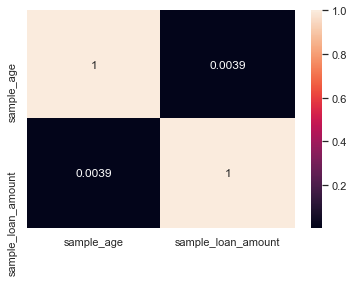

In [57]:
#heatmap from seaborn to plot correlations 
sns.heatmap(sample_df.corr(),annot= True);

As with our original source datset we have a weak negative correlation between age and loan amount.

#### Relationship between sample age and Gender in sample dataset

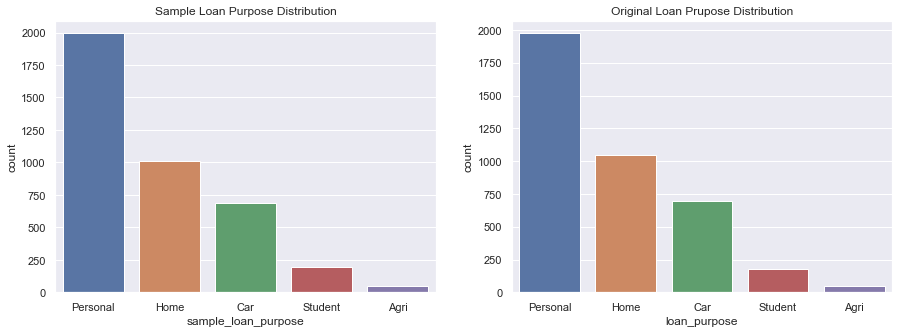

In [132]:
#set the style of the countplot
sns.set(style="darkgrid")
fig, ax = plt.subplots(1,2,figsize = (15,5))#set the axis layout and size
#generate a countplot of loan purpose
#setting the order of the countplot with thanks to stackoverflow.com/questions/46623583/seaborn-order-categories-by-count
sns.countplot(x='sample_loan_purpose',data=sample_df,order = sample_df['sample_loan_purpose'].value_counts().index, ax = ax[0]).set_title("Sample Loan Purpose Distribution");
sns.countplot(x='loan_purpose', data=df,order = df['loan_purpose'].value_counts().index, ax = ax[1]).set_title("Original Loan Prupose Distribution");
#display the plot
plt.show()

As displayed above the distirbution of our loan products/puposes between the two datasets are closely aligned.

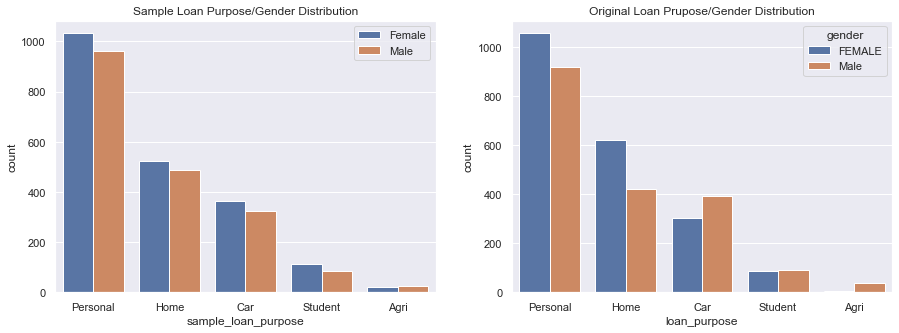

In [133]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(1,2,figsize = (15,5))#set the axis layout and size
sns.countplot(x='sample_loan_purpose',data=sample_df,hue = sample_gender, order = sample_df['sample_loan_purpose'].value_counts().index, ax = ax[0]).set_title("Sample Loan Purpose/Gender Distribution");
sns.countplot(x='loan_purpose', data=df,hue = df['gender'],order = df['loan_purpose'].value_counts().index, ax = ax[1]).set_title("Original Loan Prupose/Gender Distribution");
plt.show()

The breakdown of loan pupose by Gender is not bad but I feel i should bring in some more conditions and possibly an if statment if required. For example Agri loan purpose in our sample data is split 50/50 between males and females however from our source data it was mostly males. This is where I will need to work on my correlations ..

#### Export New Sample Dataframe to CSV

Although not required as part of the project I export my sample dataset to CSV as i wish to undertake follow up testing and investigations.

In [134]:
#export new dataframe to csv using pandas .to_csv function
sample_df.to_csv('further_testing/sample_dataset.csv')

<a id='conclusion'></a>
## Project Conclusion and Summary.

<a id='research'></a>
## Research undertaken and links to relevant sources.